## Question 1

As a senior backend engineer at Jovian, you are tasked with developing a fast in-memory data structure to manage profile information (username, name and email) for 100 million users. It should allow the following operations to be performed efficiently:
1. __Insert__ the profile information for a new user.
2. __Find__ the profile information of a user, given the username.
3. __Update__ the profile information of a user, given their username.
4. __List__ all the users of the platform, sorted by username

You can assume that usernames are unique

In [54]:
class User:
    def __init__(self, username, name, email):
        self.username = username
        self.name = name
        self.email = email
    
    def __repr__(self):
        return f"User (username: {self.username}, name: {self.name}, email: {self.email})"

    def __str__(self):
        return self.__repr__()

In [55]:
user1 = User("Jane228", "Jane", "Ja@mail.com")
user1

User (username: Jane228, name: Jane, email: Ja@mail.com)

In [56]:
josh = User("josh", "Josh Wa", "jo@mail.com")
mikki = User("mikki", "Mikle St", 'mike@mail.com')
kiki = User("kiki", "Kyle But", "bhg@mail.com")
ceee = User("ceee", "Guf Kjf", "ce@mail.com")
yter = User("yter", "Haj Ljsd", "yt@mail.com")
astr = User("astr", "Aaron Ku", "a@mail.com")
jjjj = User("jjjj", "Ilcher Uuu", "ilcher@mail.com")

In [57]:
users = [josh, mikki, kiki, ceee, yter, astr, jjjj]
users

[User (username: josh, name: Josh Wa, email: jo@mail.com),
 User (username: mikki, name: Mikle St, email: mike@mail.com),
 User (username: kiki, name: Kyle But, email: bhg@mail.com),
 User (username: ceee, name: Guf Kjf, email: ce@mail.com),
 User (username: yter, name: Haj Ljsd, email: yt@mail.com),
 User (username: astr, name: Aaron Ku, email: a@mail.com),
 User (username: jjjj, name: Ilcher Uuu, email: ilcher@mail.com)]

In [58]:
class UserDatabase:
    def __init__(self):
        self.users = []

    def insert(self, user):
        i = 0

        while i < len(self.users):
            if self.users[i].username > user.username:
                break
            i += 1
        self.users.insert(i, user)

    def find(self, username):
        for user in self.users:
            if user.username == username:
                return user

    def update(self, user):
        target = self.find(user.username)
        target.name, target.email = user.name, user.email

    def list_all(self):
        return self.users

In [59]:
database = UserDatabase()

In [60]:
database.insert(josh)
database.insert(mikki)
database.insert(kiki)

In [61]:
user = database.find('kiki')
user

User (username: kiki, name: Kyle But, email: bhg@mail.com)

In [62]:
database.update(User(username='kiki', name='Al Al', email='aaa@aaa.com'))

In [63]:
user = database.find('kiki')
user

User (username: kiki, name: Al Al, email: aaa@aaa.com)

In [64]:
database.list_all()

[User (username: josh, name: Josh Wa, email: jo@mail.com),
 User (username: kiki, name: Al Al, email: aaa@aaa.com),
 User (username: mikki, name: Mikle St, email: mike@mail.com)]

In [65]:
database.insert(astr)

In [66]:
database.list_all()

[User (username: astr, name: Aaron Ku, email: a@mail.com),
 User (username: josh, name: Josh Wa, email: jo@mail.com),
 User (username: kiki, name: Al Al, email: aaa@aaa.com),
 User (username: mikki, name: Mikle St, email: mike@mail.com)]

## Question 2

Implement a binary tree using Python, and show its usage with some examples

In [67]:
class TreeNode:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None

In [68]:
node0 = TreeNode(3)
node1 = TreeNode(4)
node2 = TreeNode(5)

In [69]:
node0.key

3

In [70]:
node0.left = node1
node0.right = node2

In [71]:
tree = node0

In [72]:
tree.key

3

In [73]:
tree.left.key

4

## Exercise

Create the following binary tree using the class __TreeNode__ defined above.

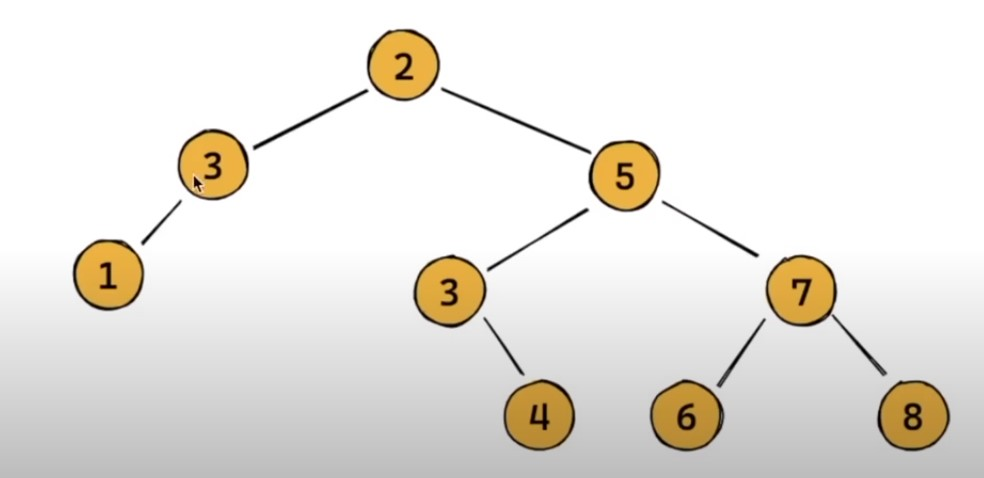

In [74]:
tree_tuple = ((1, 3, None), 2, ((None, 3, 4), 5, (6, 7, 8)))

In [75]:
def parse_tuple(data):

    if isinstance(data, tuple) and len(data) == 3:
        node = TreeNode(data[1])
        node.left = parse_tuple(data[0])
        node.right = parse_tuple(data[2])
    elif data == None:
        node = None
    else:
        node = TreeNode(data)
    return node

In [76]:
tree2 = parse_tuple(tree_tuple)

In [77]:
tree2.key

2

In [78]:
tree2.left.key, tree2.right.key

(3, 5)

## Exercise

Develop a function that converts node into tuple

In [79]:
def tree_to_tuple(node):

    if node is None:
        return None
    
    tup = (tree_to_tuple(node.left), node.key, tree_to_tuple(node.right))

    return tup

In [80]:
result = tree_to_tuple(tree2)
result


(((None, 1, None), 3, None),
 2,
 ((None, 3, (None, 4, None)), 5, ((None, 6, None), 7, (None, 8, None))))

Function to visualize a tree:

In [81]:
def display_keys(node, space='\t', level=0):

    if node == None:
        print(space*level + "x")
        return
    
    if node.left == None and node.right == None:
        print(space*level + str(node.key))
        return
    
    display_keys(node.right, space, level + 1)
    print(space*level + str(node.key))
    display_keys(node.left, space, level + 1)


In [82]:
result = display_keys(tree2)

			8
		7
			6
	5
			4
		3
			x
2
		x
	3
		1


# Traversing a binary tree

## Question 3

Write a function to perform the _inorder_ traversal of a binary tree

A _traversal_ refers to the process of visiting each node of a tree exactly once. Visiting a node generally refers to adding th node's key to a list. There are three ways to traverse a binary tree and return the list of visited keys:

### Inorder traversal

1. Traverse the left subtree recursively inorder
2. Traverse the current node
3. Traverse the right subtree recursively inorder

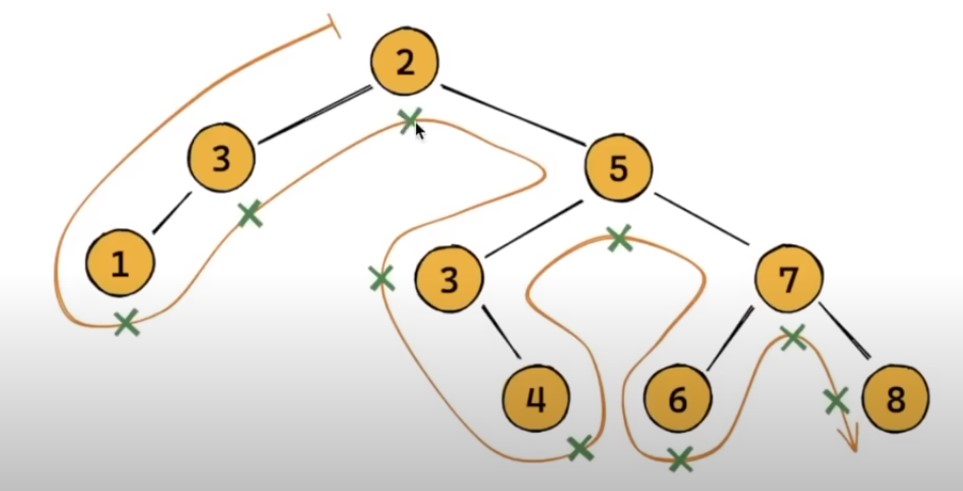

### Preorder traversal

1. Traverse the current node
2. Traverse the left tree recursively preorder
3. Traverse the right tree recursively preorder

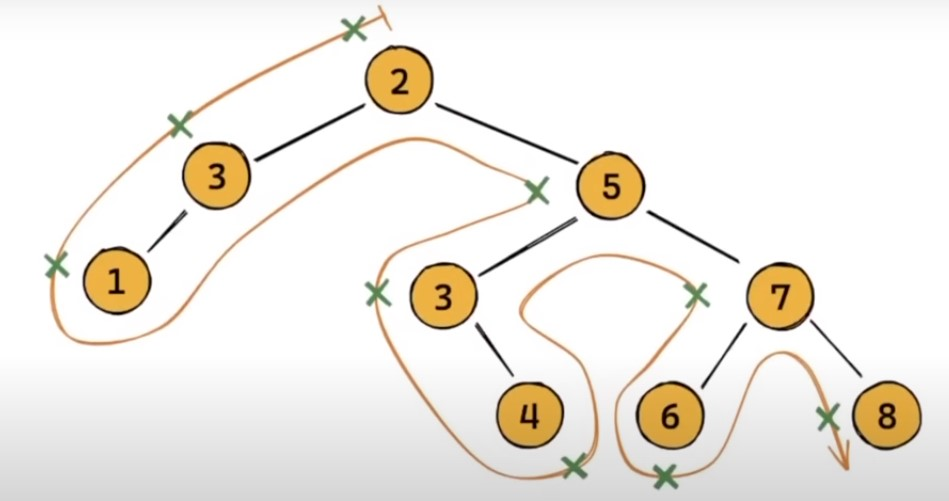

Here is an implementation of __inorder traversal__

In [83]:
def traversal_inorder(node):
    if node == None:
        return []
    return (traversal_inorder(node.left) + [node.key] + traversal_inorder(node.right))

In [84]:
traversal_inorder(tree2)

[1, 3, 2, 3, 4, 5, 6, 7, 8]

Here is the implementation of __preorder traversal__.

In [87]:
def traversal_preorder(node):
    if node == None:
        return []
    return ([node.key] + traversal_preorder(node.left) + traversal_preorder(node.right))

In [88]:
traversal_preorder(tree2)

[2, 3, 1, 5, 3, 4, 7, 6, 8]

Here is the implementation of __postorder traversal__

In [89]:
def traversal_postorder(node):
    if node == None:
        return []
    return (traversal_postorder(node.left) + traversal_postorder(node.right) + [node.key])

In [90]:
traversal_postorder(tree2)

[1, 3, 4, 3, 6, 8, 7, 5, 2]

# Height and Size of a Binary Tree

## Question

Write a function to calculate the height/depth of a binary tree

Write a function to count the number of nodes of a binary tree

In [91]:
def tree_height(node):
    if node == None:
        return 0
    return 1 + max(tree_height(node.left), tree_height(node.right))

In [92]:
tree_height(tree2)

4

In [94]:
def tree_size(node):
    if node is None:
        return 0
    return 1 + tree_size(node.left) + tree_size(node.right)

In [95]:
tree_size(tree2)

9